## Import Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import FinanceDataReader as fdr
import ta

## Import Dataset

In [2]:
# sk하이닉스, kb금융, 셀트리온, 에스엠, 엔씨소프트 
code_list = ['000660', '105560', '068270', '041510', '036570']
start, end = '2018-06', '2024-02-29'

portfolio = [fdr.DataReader(code, start = start, end = end).reset_index() for code in code_list]
portfolio

[           Date    Open    High     Low   Close   Volume    Change
 0    2018-06-01   90800   92200   89600   91400  4790644 -0.021413
 1    2018-06-04   91000   92400   89700   89800  3141036 -0.017505
 2    2018-06-05   89800   91300   89800   91000  2758383  0.013363
 3    2018-06-07   92700   92700   90600   90900  2754947 -0.001099
 4    2018-06-08   91000   91000   87600   88400  4579508 -0.027503
 ...         ...     ...     ...     ...     ...      ...       ...
 1411 2024-02-23  166900  166900  159800  161400  7012032  0.031310
 1412 2024-02-26  158400  164800  158400  161800  4329477  0.002478
 1413 2024-02-27  159000  160000  153300  153800  6107954 -0.049444
 1414 2024-02-28  154500  159200  153800  158000  3666960  0.027308
 1415 2024-02-29  154900  158400  154500  156200  3386307 -0.011392
 
 [1416 rows x 7 columns],
            Date   Open   High    Low  Close   Volume    Change
 0    2018-06-01  52600  52800  52100  52300   860865  0.009653
 1    2018-06-04  53000  547

## Indicators

In [3]:
# 이동평균(MA), 이격도(disparity)
period = [5, 20, 60, 120]

for stock in portfolio :
    for p in period :
        stock[f"{p}MA"] = stock["Close"].rolling(window = p).mean()
        stock[f"{p}Disparity"] = stock["Close"] / stock[f"{p}MA"]

portfolio[0]    

,Date,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,60MA,60Disparity,120MA,120Disparity
0,2018-06-01,90800,92200,89600,91400,4790644,-0.021413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-04,91000,92400,89700,89800,3141036,-0.017505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-05,89800,91300,89800,91000,2758383,0.013363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-07,92700,92700,90600,90900,2754947,-0.001099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-08,91000,91000,87600,88400,4579508,-0.027503,90300.0,0.978959,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2024-02-23,166900,166900,159800,161400,7012032,0.031310,153560.0,1.051055,143035.0,1.128395,137925.000000,1.170201,130473.333333,1.237034
1412,2024-02-26,158400,164800,158400,161800,4329477,0.002478,155660.0,1.039445,144255.0,1.121625,138443.333333,1.168709,130855.833333,1.236475
1413,2024-02-27,159000,160000,153300,153800,6107954,-0.049444,156500.0,0.982748,145145.0,1.059630,138816.666667,1.107936,131149.166667,1.172710
1414,2024-02-28,154500,159200,153800,158000,3666960,0.027308,158300.0,0.998105,146295.0,1.080010,139276.666667,1.134433,131470.833333,1.201787


In [4]:
# TA library

window = 10

for stock in portfolio :
    H, L, C, V = stock['High'], stock['Low'], stock['Close'], stock['Volume']
    
    # Overlay
    stock.loc[:,'bol_high'] = ta.volatility.bollinger_hband(C)
    stock.loc[:, 'bol_low']  = ta.volatility.bollinger_lband(C)
    
    # Indicators
    
    ### momentum
    stock.loc[:, 'PPO'] = ta.momentum.ppo(close = C, window_slow = 26, window_fast = 12, window_sign = 9, fillna = True)
    stock.loc[:, 'PVO'] = ta.momentum.pvo(volume = V, window_slow = 26, window_fast = 12, window_sign = 9, fillna = True)
    stock.loc[:, 'SO'] = ta.momentum.stoch(high = H, low = L, close = C, window = 14, smooth_window = 3, fillna = True)
    stock.loc[:, 'Williams_R'] = ta.momentum.williams_r(high = H, low = L, close = C, lbp = 14, fillna = True)
    
    ### volume
    stock.loc[:, 'EOM'] = ta.volume.ease_of_movement(high = H, low = L, volume = V, window = window, fillna = True)
    stock.loc[:, 'MFI'] = ta.volume.money_flow_index(high = H, low = L, close = C, volume = V, window = window, fillna = True)
    stock.loc[:, 'NVI'] = ta.volume.negative_volume_index(close = C, volume = V, fillna = True)
    stock.loc[:, 'OBV'] = ta.volume.on_balance_volume(close = C, volume = V, fillna = True)
    
    ### volatility
    stock.loc[:, 'ATR'] = ta.volatility.average_true_range(high = H, low = L, close = C, window = window, fillna = True)
    stock.loc[:, 'UI'] = ta.volatility.ulcer_index(close = C, window = window, fillna = False)
    
    ### trend
    stock.loc[:, 'ADX'] = ta.trend.adx(high = H, low = L, close = C, window = window, fillna = True)
    stock.loc[:, 'MACD'] = ta.trend.macd(close = C, fillna = True)
    stock.loc[:, 'TRIX'] = ta.trend.trix(close = C, window = window, fillna = True)
    stock.loc[:, 'CCI'] = ta.trend.cci(high = H, low = L, close = C, window = window, fillna = True)
    
portfolio[0]

,Date,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,60MA,60Disparity,120MA,120Disparity,bol_high,bol_low,PPO,PVO,SO,Williams_R,EOM,MFI,NVI,OBV,ATR,UI,ADX,MACD,TRIX,CCI
0,2018-06-01,90800,92200,89600,91400,4790644,-0.021413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,69.230769,-30.769231,0.000000e+00,50.000000,1000.000000,4790644,0.000000,NaN,0.000000,0.000000,-6.407454,0.000000
1,2018-06-04,91000,92400,89700,89800,3141036,-0.017505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139826,-2.818765,7.142857,-92.857143,1.289384e+07,0.000000,982.494530,1649608,0.000000,NaN,0.000000,-127.635328,-0.010522,-66.666667
2,2018-06-05,89800,91300,89800,91000,2758383,0.013363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142946,-5.825487,50.000000,-50.000000,-2.718984e+07,46.775164,995.623632,4407991,0.000000,NaN,0.000000,-130.453487,-0.017937,-37.500000
3,2018-06-07,92700,92700,90600,90900,2754947,-0.001099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152522,-8.292262,41.935484,-58.064516,8.384916e+07,63.811695,994.529540,1653044,0.000000,NaN,0.000000,-139.152004,-0.023556,105.882353
4,2018-06-08,91000,91000,87600,88400,4579508,-0.027503,90300.0,0.978959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.377715,-6.662330,15.686275,-84.313725,-1.744729e+08,42.033834,994.529540,-2926464,0.000000,NaN,0.000000,-343.811504,-0.044010,-166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2024-02-23,166900,166900,159800,161400,7012032,0.031310,153560.0,1.051055,143035.0,1.128395,137925.000000,1.170201,130473.333333,1.237034,159674.384003,126395.615997,3.497168,13.383683,84.375000,-15.625000,8.910399e+08,77.433132,998.855340,164667218,5539.647754,0.981157,41.052712,5046.822711,0.589921,237.608133
1412,2024-02-26,158400,164800,158400,161800,4329477,0.002478,155660.0,1.039445,144255.0,1.121625,138443.333333,1.168709,130855.833333,1.236475,162557.729305,125952.270695,3.890925,11.602703,85.511364,-14.488636,-2.586918e+08,67.373223,1001.330818,168996695,5625.682978,0.981157,43.686094,5665.465030,0.665184,137.397194
1413,2024-02-27,159000,160000,153300,153800,6107954,-0.049444,156500.0,0.982748,145145.0,1.059630,138816.666667,1.107936,131149.166667,1.172710,163486.589353,126803.410647,3.725645,13.054052,62.464183,-37.535817,-5.429805e+08,53.732416,1001.330818,162888741,5913.114680,1.845902,43.235799,5447.415964,0.696354,39.162887
1414,2024-02-28,154500,159200,153800,158000,3666960,0.027308,158300.0,0.998105,146295.0,1.080010,139276.666667,1.134433,131470.833333,1.201787,164831.178139,127758.821861,3.772965,9.948879,71.656051,-28.343949,-2.208914e+07,62.428862,1028.675353,166555701,5861.803212,1.970742,42.830533,5549.543721,0.714098,45.496480


In [5]:
# RMI
def calculate_rmi(df, period):
    delta = df["Close"].diff(6)
    delta = delta.dropna()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    
    AVG_Gain = up.rolling(window = period).mean()
    AVG_Loss = abs(down.rolling(window = period).mean())
    RM = AVG_Gain / AVG_Loss
    
    df["RMI"] = 100.0 - (100.0 / (1.0 + RM))
    
    return df

# VHF
def calculate_vhf(df, period):
    df['highest'] = df['High'].rolling(window=period).max()
    df['lowest'] = df['Low'].rolling(window=period).min()
    df['abs_diff'] = abs(df['highest'] - df['lowest'])
    df['abs_close_diff'] = abs(df['Close'] - df['Close'].shift(1)).rolling(window=period).sum()
    df['VHF'] = df['abs_diff'] / df['abs_close_diff']
    df.drop(['highest', 'lowest', 'abs_diff', 'abs_close_diff'], axis=1, inplace=True)
    
    return df

for stock in portfolio :
    calculate_rmi(stock, 10)
    calculate_vhf(stock, 10)

portfolio[0]

,Date,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,60MA,60Disparity,120MA,120Disparity,bol_high,bol_low,PPO,PVO,SO,Williams_R,EOM,MFI,NVI,OBV,ATR,UI,ADX,MACD,TRIX,CCI,RMI,VHF
0,2018-06-01,90800,92200,89600,91400,4790644,-0.021413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,69.230769,-30.769231,0.000000e+00,50.000000,1000.000000,4790644,0.000000,NaN,0.000000,0.000000,-6.407454,0.000000,NaN,NaN
1,2018-06-04,91000,92400,89700,89800,3141036,-0.017505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139826,-2.818765,7.142857,-92.857143,1.289384e+07,0.000000,982.494530,1649608,0.000000,NaN,0.000000,-127.635328,-0.010522,-66.666667,NaN,NaN
2,2018-06-05,89800,91300,89800,91000,2758383,0.013363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142946,-5.825487,50.000000,-50.000000,-2.718984e+07,46.775164,995.623632,4407991,0.000000,NaN,0.000000,-130.453487,-0.017937,-37.500000,NaN,NaN
3,2018-06-07,92700,92700,90600,90900,2754947,-0.001099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.152522,-8.292262,41.935484,-58.064516,8.384916e+07,63.811695,994.529540,1653044,0.000000,NaN,0.000000,-139.152004,-0.023556,105.882353,NaN,NaN
4,2018-06-08,91000,91000,87600,88400,4579508,-0.027503,90300.0,0.978959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.377715,-6.662330,15.686275,-84.313725,-1.744729e+08,42.033834,994.529540,-2926464,0.000000,NaN,0.000000,-343.811504,-0.044010,-166.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2024-02-23,166900,166900,159800,161400,7012032,0.031310,153560.0,1.051055,143035.0,1.128395,137925.000000,1.170201,130473.333333,1.237034,159674.384003,126395.615997,3.497168,13.383683,84.375000,-15.625000,8.910399e+08,77.433132,998.855340,164667218,5539.647754,0.981157,41.052712,5046.822711,0.589921,237.608133,99.056604,0.843023
1412,2024-02-26,158400,164800,158400,161800,4329477,0.002478,155660.0,1.039445,144255.0,1.121625,138443.333333,1.168709,130855.833333,1.236475,162557.729305,125952.270695,3.890925,11.602703,85.511364,-14.488636,-2.586918e+08,67.373223,1001.330818,168996695,5625.682978,0.981157,43.686094,5665.465030,0.665184,137.397194,99.114260,0.733333
1413,2024-02-27,159000,160000,153300,153800,6107954,-0.049444,156500.0,0.982748,145145.0,1.059630,138816.666667,1.107936,131149.166667,1.172710,163486.589353,126803.410647,3.725645,13.054052,62.464183,-37.535817,-5.429805e+08,53.732416,1001.330818,162888741,5913.114680,1.845902,43.235799,5447.415964,0.696354,39.162887,98.980632,0.714286
1414,2024-02-28,154500,159200,153800,158000,3666960,0.027308,158300.0,0.998105,146295.0,1.080010,139276.666667,1.134433,131470.833333,1.201787,164831.178139,127758.821861,3.772965,9.948879,71.656051,-28.343949,-2.208914e+07,62.428862,1028.675353,166555701,5861.803212,1.970742,42.830533,5549.543721,0.714098,45.496480,98.921251,0.629080


## Trading Trend & Shorts

In [6]:
tt1 = pd.read_csv("trading_trend_SK.csv")
tt2 = pd.read_csv("trading_trend_KB.csv")
tt3 = pd.read_csv("trading_trend_CT.csv")
tt4 = pd.read_csv("trading_trend_SM.csv")
tt5 = pd.read_csv("trading_trend_NC.csv")

sh1 = pd.read_csv("short_SK.csv")
sh2 = pd.read_csv("short_KB.csv")
sh3 = pd.read_csv("short_CT.csv")
sh4 = pd.read_csv("short_SM.csv")
sh5 = pd.read_csv("short_NC.csv")

In [7]:
new = []
tt = [tt1, tt2, tt3, tt4, tt5]
sh = [sh1, sh2, sh3, sh4, sh5]

for i in range(5) :
    portfolio[i].index = portfolio[i]["Date"]
    portfolio[i].index = pd.to_datetime(portfolio[i].index).strftime('%Y-%m-%d')
    portfolio[i] = portfolio[i].loc['2019-01-02':, :].drop("Date", axis = 1)
    
    tt[i].index = tt[i]["Date"]
    tt[i] = tt[i].drop("Date", axis = 1)
    sh[i].index = sh[i]["Date"]
    sh[i] = sh[i].drop("Date", axis = 1)
    
    portfolio[i] = portfolio[i].merge(tt[i], left_index = True, right_index = True)
    portfolio[i] = portfolio[i].merge(sh[i], left_index = True, right_index = True)
    new.append(portfolio[i])
    
portfolio = new
portfolio[0]

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,60MA,60Disparity,120MA,120Disparity,bol_high,bol_low,PPO,PVO,SO,Williams_R,EOM,MFI,NVI,OBV,ATR,UI,ADX,MACD,TRIX,CCI,RMI,VHF,Institutional_trading,Individual_trading,Foreign_trading,Short_volume,Short_left
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,61300,61400,60000,60600,1934295,0.001653,60640.0,0.999340,63490.0,0.954481,67818.333333,0.893564,74242.500000,0.816244,70342.123758,56637.876242,-3.745153,-7.402762,29.411765,-70.588235,-5.066445e+07,31.147954,1327.026312,-51793453,1852.667058,8.659060,34.775740,-2398.314386,-0.685143,14.159292,8.206687,0.500000,-5544,-308177,313993,283672,1355760
2019-01-03,60200,60300,57500,57700,3337621,-0.047855,60100.0,0.960067,62850.0,0.918059,67608.333333,0.853445,74012.500000,0.779598,69345.382976,56354.617024,-3.987714,-5.422567,2.247191,-97.752809,-1.510058e+08,30.454198,1327.026312,-55131074,1977.400352,8.323187,35.672992,-2534.924679,-0.677795,-142.450142,8.823529,0.424779,-134388,473844,-330857,472084,1579206
2019-01-04,57500,58500,56700,58300,3388087,0.010399,59740.0,0.975896,62315.0,0.935569,67393.333333,0.865071,73768.333333,0.790312,68448.604161,56181.395839,-4.060274,-3.690663,16.494845,-83.505155,-6.906552e+07,30.350929,1327.026312,-51742987,1959.660317,7.829902,36.946191,-2565.204257,-0.673406,-141.335227,9.540636,0.518519,214278,-337039,138713,114527,1432217
2019-01-07,59000,59700,58400,58700,2273750,0.006861,59160.0,0.992224,61840.0,0.949224,67200.000000,0.873512,73530.000000,0.798314,67532.591677,56147.408323,-4.022165,-5.314633,23.255814,-76.744186,8.290269e+07,39.536221,1336.131124,-49469237,1903.694285,7.352235,36.292747,-2527.785644,-0.663587,-51.194539,10.756972,0.538462,124196,-7434,-132886,203543,1326974
2019-01-08,57900,60500,57600,59200,3062192,0.008518,58900.0,1.005093,61500.0,0.962602,67036.666667,0.883099,73300.000000,0.807640,66965.894254,56034.105746,-3.882902,-4.382460,43.103448,-56.896552,0.000000e+00,53.294872,1336.131124,-46407045,2003.324856,6.364327,35.704647,-2429.776353,-0.643131,-44.365362,13.567839,0.608696,188124,-547042,364414,211532,1400451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,166900,166900,159800,161400,7012032,0.031310,153560.0,1.051055,143035.0,1.128395,137925.000000,1.170201,130473.333333,1.237034,159674.384003,126395.615997,3.497168,13.383683,84.375000,-15.625000,8.910399e+08,77.433132,998.855340,164667218,5539.647754,0.981157,41.052712,5046.822711,0.589921,237.608133,99.056604,0.843023,-878150,-433618,1313620,70639,1572988
2024-02-26,158400,164800,158400,161800,4329477,0.002478,155660.0,1.039445,144255.0,1.121625,138443.333333,1.168709,130855.833333,1.236475,162557.729305,125952.270695,3.890925,11.602703,85.511364,-14.488636,-2.586918e+08,67.373223,1001.330818,168996695,5625.682978,0.981157,43.686094,5665.465030,0.665184,137.397194,99.114260,0.733333,-213925,85427,-7913,15348,1427733
2024-02-27,159000,160000,153300,153800,6107954,-0.049444,156500.0,0.982748,145145.0,1.059630,138816.666667,1.107936,131149.166667,1.172710,163486.589353,126803.410647,3.725645,13.054052,62.464183,-37.535817,-5.429805e+08,53.732416,1001.330818,162888741,5913.114680,1.845902,43.235799,5447.415964,0.696354,39.162887,98.980632,0.714286,-489686,759964,-283206,2523,1422572


## Check Missing Values

In [8]:
stock = ["sk하이닉스", "KB금융", "셀트리온", "에스엠", "엔씨소프트"]
for i in range(5) : 
    print(f'==============={stock[i]}===============')
    print(portfolio[i].isnull().sum())

===============sk하이닉스===============
Open                     0
High                     0
Low                      0
Close                    0
Volume                   0
Change                   0
5MA                      0
5Disparity               0
20MA                     0
20Disparity              0
60MA                     0
60Disparity              0
120MA                    0
120Disparity             0
bol_high                 0
bol_low                  0
PPO                      0
PVO                      0
SO                       0
Williams_R               0
EOM                      0
MFI                      0
NVI                      0
OBV                      0
ATR                      0
UI                       0
ADX                      0
MACD                     0
TRIX                     0
CCI                      0
RMI                      0
VHF                      0
Institutional_trading    0
Individual_trading       0
Foreign_trading          0
Short_volume      

## Save

In [9]:
stock = ['sk', 'kb', 'ct', 'sm', 'nc']

for i in range(5) :
    portfolio[i].to_csv("stock_"+ stock[i] + ".csv")

## heatmap

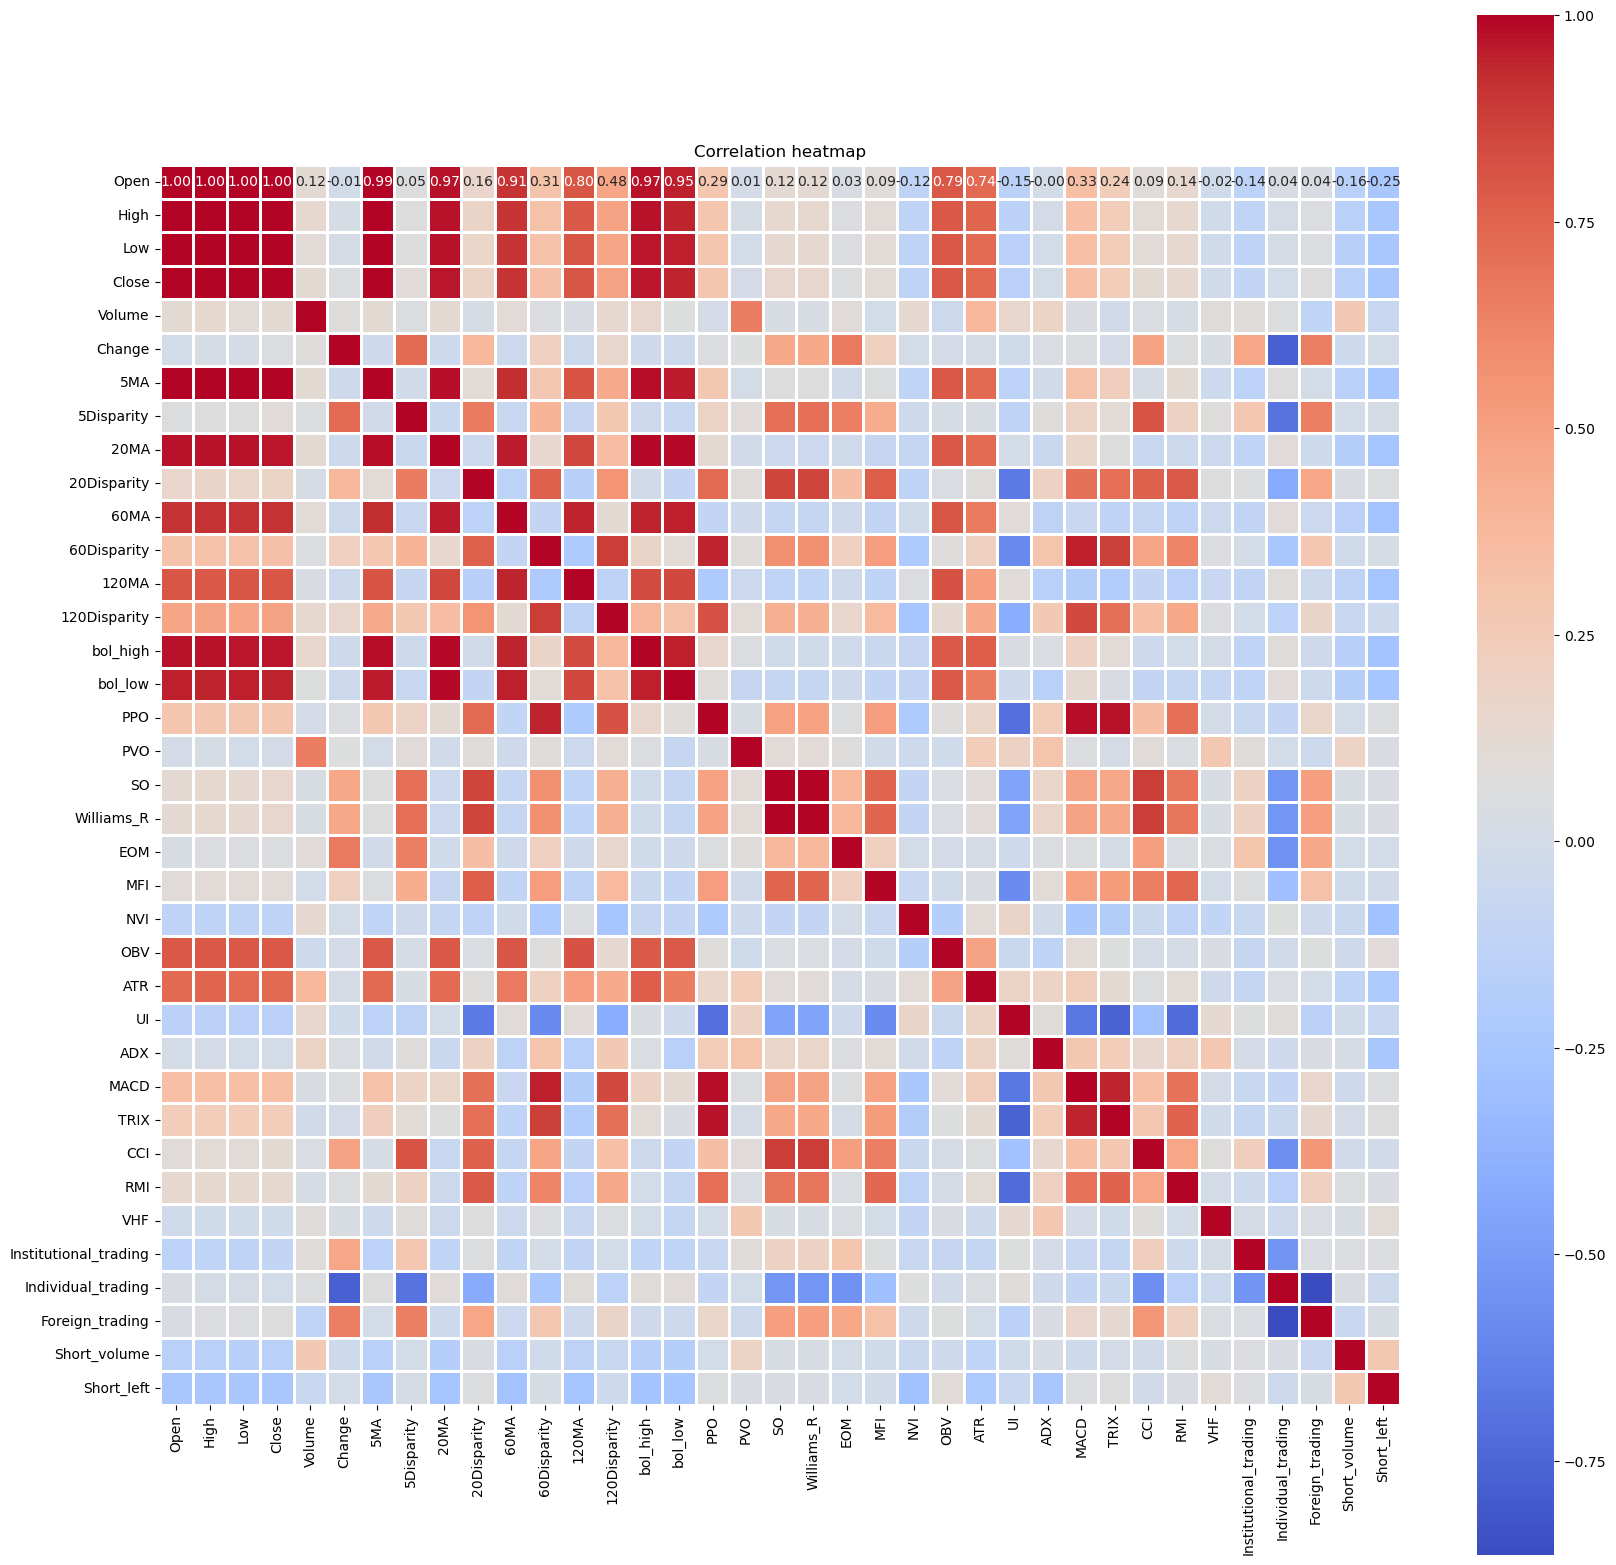

In [10]:
# sk하이닉스
plt.figure(figsize=(20, 20))

sns.heatmap(
    portfolio[0].select_dtypes(include=['float64', 'int']).corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    fmt=".2f",
)

plt.title('Correlation heatmap')
plt.show()

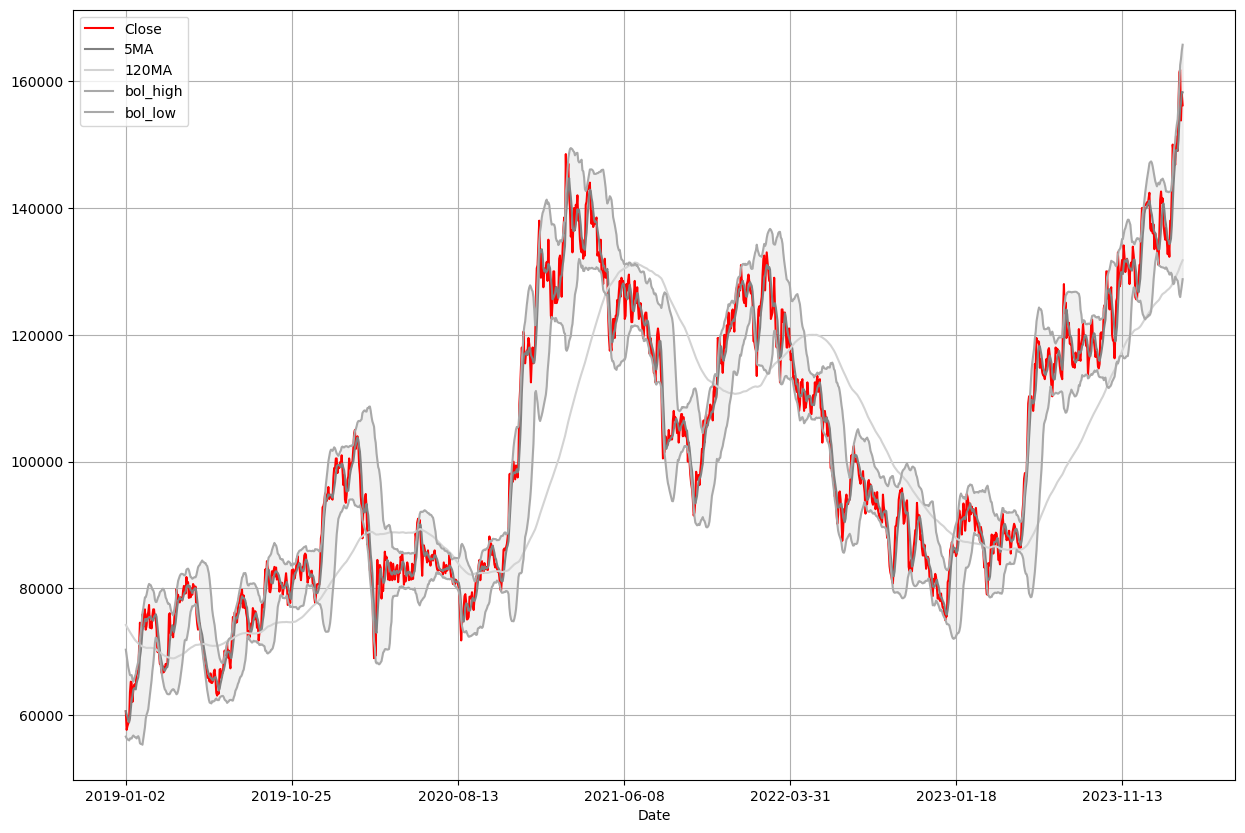

In [11]:
# sk하이닉스
fig, ax = plt.subplots(figsize=(15, 10))
portfolio[0][["Close", "5MA", "120MA", "bol_high", "bol_low"]].plot(ax = ax, color = ["red", "gray", "lightgray", "darkgray", "darkgray"])
ax.fill_between(portfolio[0].index, portfolio[0]['bol_low'], portfolio[0]['bol_high'], color = 'lightgray', alpha = 0.3)
plt.grid()
plt.show()
plt.close()

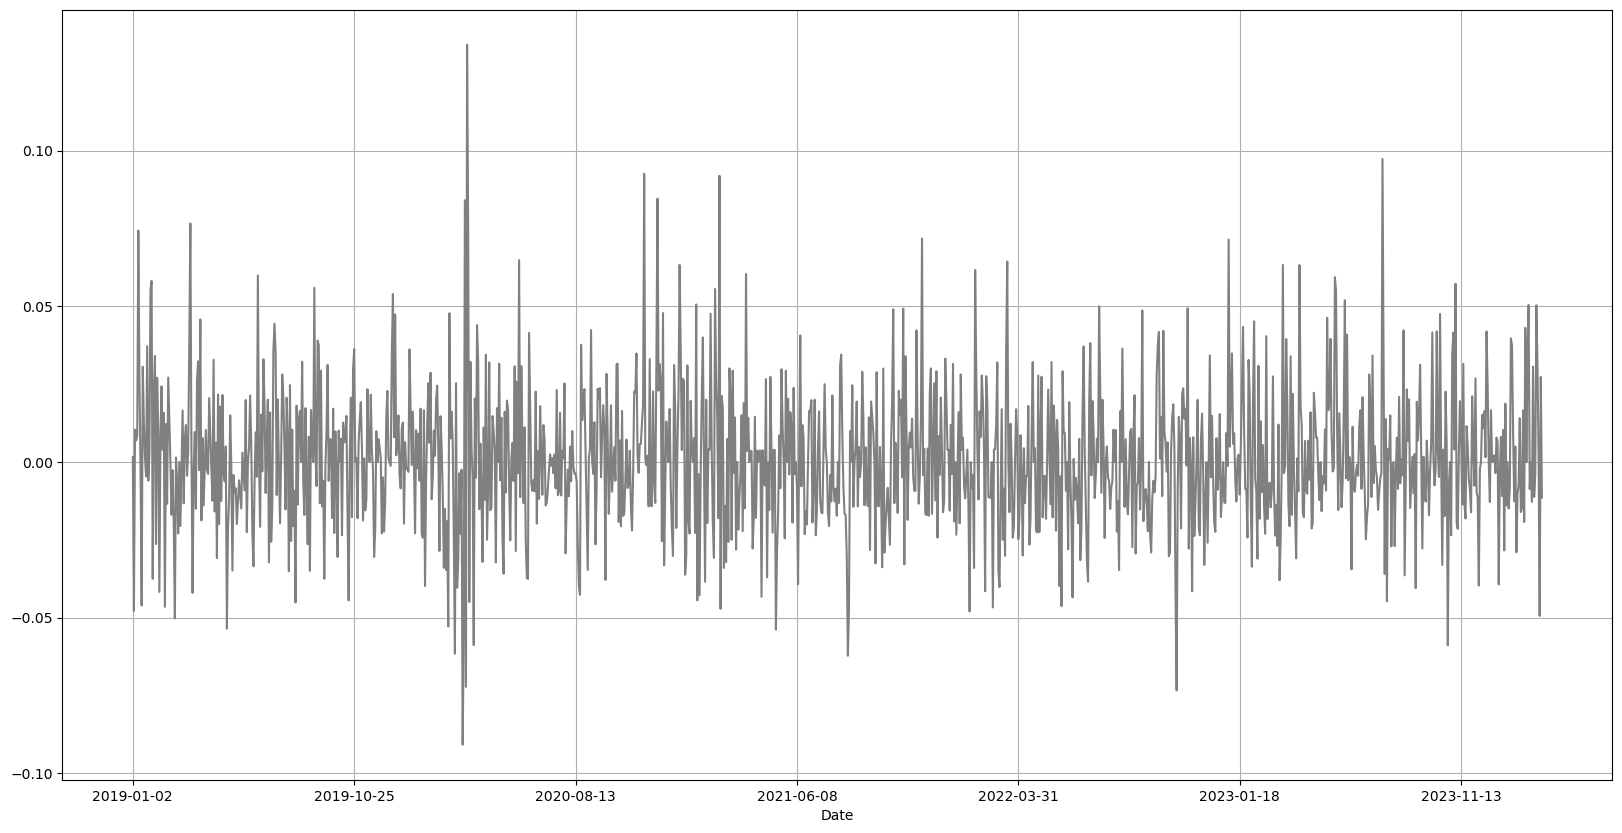

In [15]:
plt.figure(figsize = (20, 10))
portfolio[0]["Change"].plot(color = 'gray')
plt.grid()